In [1]:
################################################
########## COUNTING WORDS AND PHRASES ##########
################################################

In [2]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [3]:
# read in dataframes separated by year
movie_df_2000_2020_n75 = pd.read_csv("/Users/laurenbeard/Desktop/compContentAnalysis/Content-Analysis-2020/final/dataframes/movie_df_2000_2020_n75.csv")

In [4]:
##############################
########## WORD2VEC ##########
##############################

In [5]:
# tokenize and normalize
movie_df_2000_2020_n75['tokenized_sents'] = movie_df_2000_2020_n75['Text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
movie_df_2000_2020_n75['normalized_sents'] = movie_df_2000_2020_n75['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [6]:
movieW2V_2000_2020_n75 = gensim.models.word2vec.Word2Vec(movie_df_2000_2020_n75['normalized_sents'].sum())

In [7]:
movieW2V_2000_2020_n75.wv.index2entity[:10]

['know', 'be', 'yes', 'like', 'get', 'come', 'oh', 'right', 'think', 'have']

In [8]:
print(movieW2V_2000_2020_n75)

Word2Vec(vocab=4584, size=100, alpha=0.025)


In [9]:
# look at words most similar to 'kill' (co-sine similarity)
movieW2V_2000_2020_n75.most_similar('kill')

[('die', 0.9990909695625305),
 ('today', 0.9990036487579346),
 ('run', 0.9989867806434631),
 ('let', 0.9988238215446472),
 ('check', 0.9987808465957642),
 ('tomorrow', 0.9987589716911316),
 ('guess', 0.9986319541931152),
 ('walk', 0.9984244704246521),
 ('jim', 0.9984190464019775),
 ('real', 0.9984169006347656)]

In [12]:
movieW2V_2000_2020_n75.most_similar('shoot')

[('s', 0.9996716976165771),
 ('money', 0.9996561408042908),
 ('beat', 0.9996470212936401),
 ('doctor', 0.9996358156204224),
 ('cause', 0.9996227025985718),
 ('soon', 0.999617874622345),
 ('probably', 0.9995954036712646),
 ('explain', 0.9995700120925903),
 ('motherfucker', 0.9995322823524475),
 ('tough', 0.9995321035385132)]

In [16]:
movieW2V_2000_2020_n75.most_similar('die')

[('check', 0.9993589520454407),
 ('today', 0.9992080330848694),
 ('tomorrow', 0.9991610646247864),
 ('walk', 0.9991544485092163),
 ('kill', 0.9990909695625305),
 ('mama', 0.9990371465682983),
 ('real', 0.999019205570221),
 ('guess', 0.9990155696868896),
 ('start', 0.9989961385726929),
 ('wear', 0.9989320635795593)]

In [19]:
movieW2V_2000_2020_n75.most_similar('fuck')

[('shit', 0.9982289671897888),
 ('right', 0.9973909854888916),
 ('help', 0.9966780543327332),
 ('say', 0.9963282942771912),
 ('kill', 0.9961456656455994),
 ('tell', 0.9961384534835815),
 ('late', 0.9959703087806702),
 ('ready', 0.9959641098976135),
 ('tomorrow', 0.9957128763198853),
 ('afraid', 0.9956231117248535)]

In [23]:
# movieW2V_2000_2020_n75.doesnt_match(['kill', 'die', 'save','help'])

In [21]:
movieW2V_2000_2020_n75.save("movieWORD2Vec_2000_2020_n75")

In [28]:
# get the top 500 words
numWords_2000_2020_n75 = 500
targetWords_2000_2020_n75 = movieW2V_2000_2020_n75.wv.index2word[:numWords_2000_2020_n75]

In [31]:
# do only 46-145 in order to look at meaningful words (did same for other word embeddings code)
targetWords_2000_2020_n75 = targetWords_2000_2020_n75[46:145]

In [32]:
# extract their vectors and create our own smaller matrix that preserved the distances from the original:
wordsSubMatrix_2000_2020_n75 = []
for word in targetWords_2000_2020_n75:
    wordsSubMatrix_2000_2020_n75.append(movieW2V_2000_2020_n75[word])
wordsSubMatrix_2000_2020_n75 = np.array(wordsSubMatrix_2000_2020_n75)
wordsSubMatrix_2000_2020_n75

array([[-0.00739829, -0.10433841,  0.09077303, ...,  0.43229717,
        -0.14581011,  0.16924568],
       [ 0.21194027, -0.04054518,  0.15998086, ...,  0.5128399 ,
        -0.25086796,  0.36787534],
       [ 0.15912428, -0.0127664 ,  0.08259389, ...,  0.44709665,
        -0.17561191,  0.2890285 ],
       ...,
       [ 0.08239625, -0.01563594,  0.07796406, ...,  0.40976697,
        -0.1442811 ,  0.25489318],
       [ 0.06144002, -0.04870824,  0.09346421, ...,  0.4455297 ,
        -0.15917459,  0.22868259],
       [ 0.04063238, -0.0302395 ,  0.06069074, ...,  0.35241258,
        -0.11646961,  0.18005182]], dtype=float32)

In [33]:
# use PCA to reduce the dimesions (e.g., to 50), and T-SNE to project them down to the two we will visualize
pcaWords_2000_2020_n75 = sklearn.decomposition.PCA(n_components = 10).fit(wordsSubMatrix_2000_2020_n75)
reducedPCA_data_2000_2020_n75 = pcaWords_2000_2020_n75.transform(wordsSubMatrix_2000_2020_n75)
#T-SNE is theoretically better, but you should experiment
tsneWords_2000_2020_n75 = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data_2000_2020_n75)

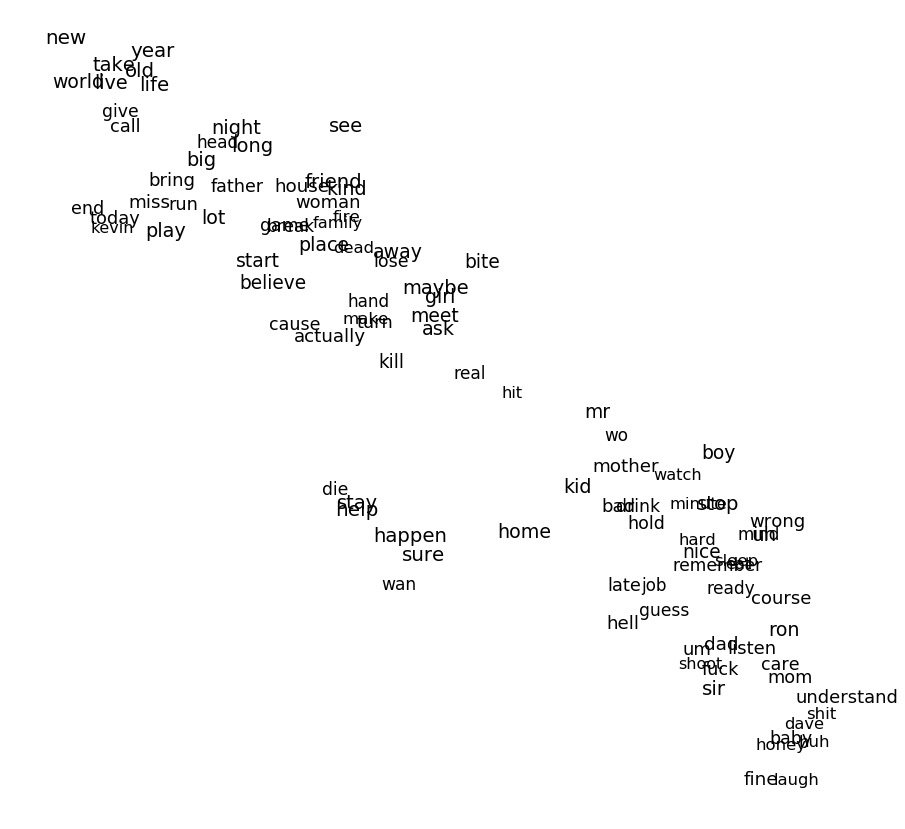

In [38]:
# Visualize
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords_2000_2020_n75[:, 0], tsneWords_2000_2020_n75[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords_2000_2020_n75):
    ax.annotate(word, (tsneWords_2000_2020_n75[:, 0][i],tsneWords_2000_2020_n75[:, 1][i]), size =  20 * (numWords_2000_2020_n75 - i) / numWords_2000_2020_n75)
plt.xticks(())
plt.yticks(())
plt.show()

In [18]:
#############################
########## DOC2VEC ##########
#############################

In [20]:
# We will load these as documents into Word2Vec, but first we need to normalize and pick some tags.
keywords = ['good', 'bad', 'kill', 'save', 'stop', 'fight','beat','man','woman','miss','mr','mother','dad','good','right','wrong','afraid','fuck','shoot','die','dead','death']

In [21]:
taggedDocs_2000_2020_n75 = []
for index, row in movie_df_2000_2020_n75.iterrows():
    #Just doing a simple keyword assignment
    docKeywords_2000_2020_n75 = [s for s in keywords if s in row['normalized_words']]
    docKeywords_2000_2020_n75.append(row['Year'])
    docKeywords_2000_2020_n75.append(row['Movie Name']) #This lets us extract individual documnets since doi's are unique
    taggedDocs_2000_2020_n75.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords_2000_2020_n75))
movie_df_2000_2020_n75['TaggedAbstracts'] = taggedDocs_2000_2020_n75

In [22]:
movieD2V_2000_2020_n75 = gensim.models.doc2vec.Doc2Vec(movie_df_2000_2020_n75['TaggedAbstracts'], size = 50) #Limiting to 50 dimensions

/opt/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [23]:
movieD2V_2000_2020_n75.docvecs.most_similar([ movieD2V_2000_2020_n75['kill'] ], topn=5 )

[('kill', 1.0),
 (1902, 0.5437500476837158),
 (358, 0.4800480604171753),
 (811, 0.4620140790939331),
 ('Blood Done Sign My Name', 0.45388680696487427)]

In [23]:
################################
########## PROJECTION ##########
################################

In [24]:
#words to create dimensions
tnytTargetWords = ['good', 'bad', 'kill', 'save', 'stop', 'fight','beat','good','right','wrong','afraid','fuck','shoot','die','dead','death']
#words we will be mapping
tnytTargetWords += ['man','woman','old','money','right', 'know','wrong','miss','mr','mother','dad']

In [25]:
# extract their vectors and create our own smaller matrix that preserved the distances from the original:
wordsSubMatrix_2000_2020_n75 = []
for word in tnytTargetWords:
    wordsSubMatrix_2000_2020_n75.append(movieW2V_2000_2020_n75[word])
wordsSubMatrix_2000_2020_n75 = np.array(wordsSubMatrix_2000_2020_n75)

In [26]:
pcaWordsMovie_2000_2020_n75 = sklearn.decomposition.PCA(n_components = 10).fit(wordsSubMatrix_2000_2020_n75)
reducedPCA_dataMovie_2000_2020_n75 = pcaWordsMovie_2000_2020_n75.transform(wordsSubMatrix_2000_2020_n75)
#T-SNE is theoretically better, but you should experiment
tsneWordsMovie_2000_2020_n75 = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataMovie_2000_2020_n75)

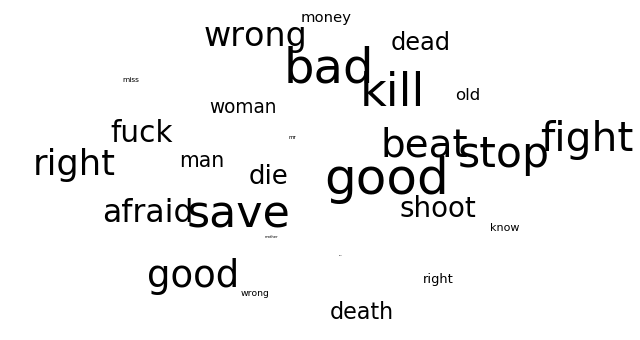

In [27]:
# visualization
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsMovie_2000_2020_n75[:, 0], tsneWordsMovie_2000_2020_n75[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsMovie_2000_2020_n75[:, 0][i],tsneWordsMovie_2000_2020_n75[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
# Define some convenient functions for getting dimensions.
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [30]:
# Let's calculate 2 dimensions: violence and nonviolence
violence_2000_2020_n75 = dimension(movieW2V_2000_2020_n75, ['wrong'], ['fight','kill','shoot','die','dead','death','gun','police'])
nonviolence_2000_2020_n75 = dimension(movieW2V_2000_2020_n75, ['right'], ['save','stop'])

In [60]:
# words around gender and incentives
#gender = ['man','woman','mr','dear','father','gentleman']
#incentive = ['money','know','right','good','bad','truth','kill','die']
gender = ['man','woman','gentleman','lady']
incentive = ['money','good','bad','truth','win','lose']

In [61]:
# Define a function to project words in a word list to each of the 2 dimensions
def makeDF(model, word_list):
    n = []
    v = []
    for word in word_list:
        n.append(sklearn.metrics.pairwise.cosine_similarity(movieW2V_2000_2020_n75[word].reshape(1,-1), violence_2000_2020_n75.reshape(1,-1))[0][0])
        v.append(sklearn.metrics.pairwise.cosine_similarity(movieW2V_2000_2020_n75[word].reshape(1,-1), nonviolence_2000_2020_n75.reshape(1,-1))[0][0])
    df = pd.DataFrame({'nonviolence': n, 'violence': v}, index = word_list)
    return df

In [62]:
# Get the projections.
genderdf_2000_2020_n75 = makeDF(movieW2V_2000_2020_n75, gender) 
incentivedf_2000_2020_n75 = makeDF(movieW2V_2000_2020_n75, incentive)

In [63]:
# Define some useful functions for plotting.
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

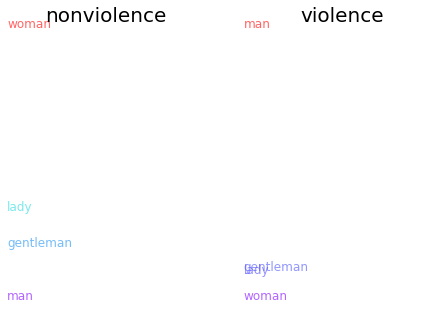

In [64]:
# Plot the gender words in the 2 dimensions 
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, genderdf_2000_2020_n75, 'nonviolence')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, genderdf_2000_2020_n75, 'violence')
plt.show()

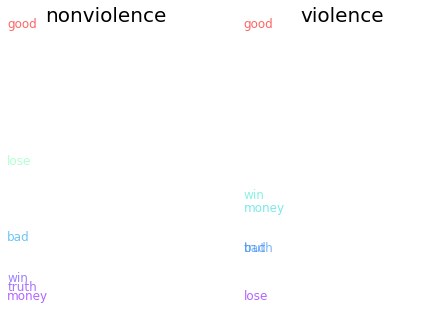

In [65]:
# Plot the incentive words in the dimensions
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, incentivedf_2000_2020_n75, 'nonviolence')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, incentivedf_2000_2020_n75, 'violence')
plt.show()